# Data Mining Cheat Sheet
https://towardsdatascience.com/data-handling-using-pandas-cleaning-and-processing-3aa657dc9418

In [125]:
# python
import sys
import os

# iPython
import IPython
from IPython.display import display

# pandas
import pandas as pd

# numpy
import numpy as np

# seaborn
import seaborn as sns

# matplotlib
import matplotlib.pyplot as plt

# plotly
import plotly as ply
import plotly.figure_factory as ff
ply.offline.init_notebook_mode(connected=True)

## Import Data

In [126]:
movies_df = pd.read_csv("./../sample_files/data/movie_metadata.csv")
movies_df.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0


## Get Basic Informations

In [127]:
print("data-frame shape: ", movies_df.shape)

data-frame shape:  (5043, 28)


## Handling Missing Data
http://pandas.pydata.org/pandas-docs/stable/user_guide/missing_data.html

In [128]:
print("null values: \n")
print(movies_df.isna())

null values: 

      color  director_name  num_critic_for_reviews  duration  \
0     False          False                   False     False   
1     False          False                   False     False   
2     False          False                   False     False   
3     False          False                   False     False   
4      True          False                    True      True   
5     False          False                   False     False   
6     False          False                   False     False   
7     False          False                   False     False   
8     False          False                   False     False   
9     False          False                   False     False   
10    False          False                   False     False   
11    False          False                   False     False   
12    False          False                   False     False   
13    False          False                   False     False   
14    False          Fals

In [129]:
print(movies_df.isna().sum())

color                         19
director_name                104
num_critic_for_reviews        50
duration                      15
director_facebook_likes      104
actor_3_facebook_likes        23
actor_2_name                  13
actor_1_facebook_likes         7
gross                        884
genres                         0
actor_1_name                   7
movie_title                    0
num_voted_users                0
cast_total_facebook_likes      0
actor_3_name                  23
facenumber_in_poster          13
plot_keywords                153
movie_imdb_link                0
num_user_for_reviews          21
language                      12
country                        5
content_rating               303
budget                       492
title_year                   108
actor_2_facebook_likes        13
imdb_score                     0
aspect_ratio                 329
movie_facebook_likes           0
dtype: int64


In [130]:
print("total null values: ", movies_df.isna().sum().sum())

total null values:  2698


## Drop Missing Data
So dropping rows containing NA values in any of the columns resulted in almost 1300 rows reduction. This can be important for data-sets with less number of rows where dropping all rows with any missing value can cost us losing necessary information.

In [131]:
clean_movies_df = movies_df.dropna(how='any')

print("new dataframe shape: ", clean_movies_df.shape)
print("old dataframe shape: ", movies_df.shape)

new dataframe shape:  (3756, 28)
old dataframe shape:  (5043, 28)


## Fill Missing Data
Fill data with Zero's or another value

In [132]:
movies_df_tmp = movies_df.copy()
movies_df_tmp.fillna(value=0, inplace = True)
print("total null values: ", movies_df_tmp.isna().sum().sum())

total null values:  0


Fill Specific Coloumns

In [133]:
movies_df_tmp = movies_df.copy()
movies_df_tmp[['gross', 'budget']] = movies_df_tmp[['gross', 'budget']].fillna(value=0)
print("total null values: ", movies_df_tmp.isna().sum().sum())

total null values:  1322


For columns with ‘object’ dtypes, for example ‘language’ column, we can use some words like “no info” to fill up the missing entries.

In [134]:
movies_df_tmp['language'].fillna("no info", inplace=True)
print("total null values: ", movies_df_tmp.isna().sum().sum())

total null values:  1310


### Fill with ffill
Another method to fill the missing value could be ffill method, which propagates last valid observation to the next. Similarly bfill method uses next observation to fill gap.

In [135]:
movies_df_tmp = movies_df.copy()
movies_df_tmp['language'].fillna(method='ffill', inplace=True)
print("total null values: ", movies_df_tmp.isna().sum().sum())

total null values:  2686


### Fill with Mean values

In [136]:
movies_df_tmp = movies_df.copy()
movies_df_tmp['budget'].fillna(movies_df_tmp['budget'].mean(), inplace=True)
print("total null values: ", movies_df_tmp.isna().sum().sum())

total null values:  2206


## Duplicated Data
https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.duplicated.html
### For all coloums

In [137]:
duplicate_rows_df = movies_df[movies_df.duplicated()]
print("number of duplicate rows: ", duplicate_rows_df.shape)

number of duplicate rows:  (45, 28)


### For specific coloums

In [138]:
duplicated_rows_df_imdb_link= movies_df[movies_df.duplicated(['movie_imdb_link'])]

print(duplicated_rows_df_imdb_link.shape)

(124, 28)


### Check for unique values
https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.unique.html

In [139]:
print(len(movies_df.movie_imdb_link.unique()))

4919


### Drop Duplicates
https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.drop_duplicates.html

In [140]:
print("shape of dataframe after dropping duplicates", movies_df.drop_duplicates().shape)

shape of dataframe after dropping duplicates (4998, 28)


## Data Binding
Another very important data processing technique is data bucketing or data binning. We will see an example here with binning IMDb-score using pandas.cut() method. Based on the score [0.,4., 7., 10.], I want to put movies in different buckets [‘shyyyte’, ‘moderate’, ‘good’]. As you can understand movies with score between 0–4 will be put into the ‘shyyyte’ bucket and so on. We can do this with the following lines of code

https://pandas.pydata.org/pandas-docs/version/0.23.4/generated/pandas.cut.html

In [141]:
op_labels = ['shyttte', 'moderate', 'good']
category = [0.,4.,7.,10.]

movies_df['imdb_labels'] = pd.cut(movies_df['imdb_score'], labels=op_labels, bins=category, include_lowest=False)
print(movies_df[['movie_title', 'imdb_score', 'imdb_labels']][209:220])

                             movie_title  imdb_score imdb_labels
209                               Rio 2          6.4    moderate
210                             X-Men 2          7.5        good
211                           Fast Five          7.3        good
212  Sherlock Holmes: A Game of Shadows          7.5        good
213                 Clash of the Titans          5.8    moderate
214                        Total Recall          7.5        good
215                    The 13th Warrior          6.6    moderate
216                   The Bourne Legacy          6.7    moderate
217                      Batman & Robin          3.7     shyttte
218      How the Grinch Stole Christmas          6.0    moderate
219              The Day After Tomorrow          6.4    moderate


## Outliers Detection
Most of the times for Exploratory Data Analysis (EDA), outlier detection is an important segment, as, outlier for particular features may distort the true picture, so we need to disregard them. Specifically, outliers can play havoc when we want to apply machine learning algorithm for prediction. At the same time outliers can even help us for anomaly detection. So let’s see how we can use Pandas to detect outliers in this particular data-frame.

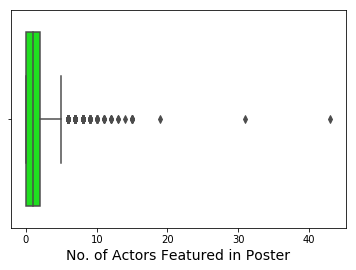

In [142]:
sns.boxplot(x=movies_df['facenumber_in_poster'], color='lime')
plt.xlabel('No. of Actors Featured in Poster', fontsize=14)
plt.show()

See title with maximum number of actors

In [143]:
print(movies_df[['movie_title', 'facenumber_in_poster']].iloc[movies_df['facenumber_in_poster'].idxmax()])

movie_title             500 Days of Summer 
facenumber_in_poster                     43
Name: 3468, dtype: object


Let’s see a basic statistical details of this column ‘facenumber_in_poster’ with [pandas.DataFrame.describe()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.describe.html) method.

In [144]:
print(movies_df['facenumber_in_poster'].describe())

count    5030.000000
mean        1.371173
std         2.013576
min         0.000000
25%         0.000000
50%         1.000000
75%         2.000000
max        43.000000
Name: facenumber_in_poster, dtype: float64


### Z-Score
Z score is a number (dimensionless) that signifies how much standard deviation a data point is, from the mean. Z score simply can be defined as —

Z =(X-μ)/σ, where μ is the population mean and σ is the standard deviation, X is one element in the population.

1. Check the data types of all column in the data-frame

[DataFrame.dtypes](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.dtypes.html)

In [145]:
print("data types: \n", movies_df.dtypes)

data types: 
 color                          object
director_name                  object
num_critic_for_reviews        float64
duration                      float64
director_facebook_likes       float64
actor_3_facebook_likes        float64
actor_2_name                   object
actor_1_facebook_likes        float64
gross                         float64
genres                         object
actor_1_name                   object
movie_title                    object
num_voted_users                 int64
cast_total_facebook_likes       int64
actor_3_name                   object
facenumber_in_poster          float64
plot_keywords                  object
movie_imdb_link                object
num_user_for_reviews          float64
language                       object
country                        object
content_rating                 object
budget                        float64
title_year                    float64
actor_2_facebook_likes        float64
imdb_score                    float6

2. Create a new data-frame excluding all the ‘object’ types column

[DataFrame.select_dtypes](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.select_dtypes.html)

In [150]:
print("shape before :", movies_df.shape)

movies_df_num = movies_df.select_dtypes(exclude=['object'])

print("shape after excluding object columns: ", movies_df_num.shape)

shape before : (5043, 29)
shape after excluding object columns:  (5043, 17)


3. Select elements from each column that lie within 3 units of Z score

In [153]:
from scipy import stats
movies_df_Zscore = movies_df_num[(np.abs(stats.zscore(movies_df_num))<3).all(axis=1)]
print("shape after rejecting outliers: ", movies_df_Zscore.shape)

TypeError: unsupported operand type(s) for /: 'str' and 'int'